In [53]:
%load_ext autoreload
%autoreload 2

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from classifier_choice import *

In [69]:
from well_load import *

In [56]:
digits = datasets.load_digits()

In [57]:
data = digits.data
labels = digits.target

In [58]:
n_samples, n_features = data.shape

In [59]:
methods = [ 'pca', 'isomap', 'lle', 'mlle', 'hlle', 'ltsa', 'mds', 'trees','tsne']

In [99]:
from matplotlib import offsetbox
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(20,15))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [ ]:
for mathod in methods:
    clf = classifier_choice(mathod)
    clusters = data_fit(clf,data)
    plot_embedding(clusters,labels,mathod)
plt.show()

In [73]:
well_data = wells_load("wells")
well_data.head()

,DEN,DT,DTS,DTS_I7,DTS_MLFILLED,GR,LITHESA10,LITHESA9_FILTR,LITHESA9_I4,LITHESA9_I8,LITHESA9_I8I4,NPHI,PHIE_I7,PHIE_I8I7,PHIE_MLFILLED,RDEP,RMED,Well,TD
0,2.001409,155.183043,481.094017,519.064866,481.094017,10.481200,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.22121
1,2.001409,155.183043,481.094017,519.064866,481.094017,10.702790,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.37361
2,2.001409,155.183043,481.094017,519.064866,481.094017,10.547792,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.52601
3,2.001409,155.183043,481.094017,519.064866,481.094017,10.420900,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.67841
4,2.001409,155.183043,481.094017,519.064866,481.094017,11.238597,5891.0,5891.0,5868.0,5891.0,5868.0,0.722802,0.05792,0.05792,0.05792,0.664799,0.518799,16_7-10.las,160.83081


In [76]:
classifier = classifier_choice('pca')
well_clusters = data_fit(classifier,well_data.drop(['Well'],axis=1))

In [86]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(well_data['Well'].unique())
well_labels = le.transform(well_data['Well'])

In [90]:
well_data['Well'].unique()

array(['16_7-10.las'], dtype=object)

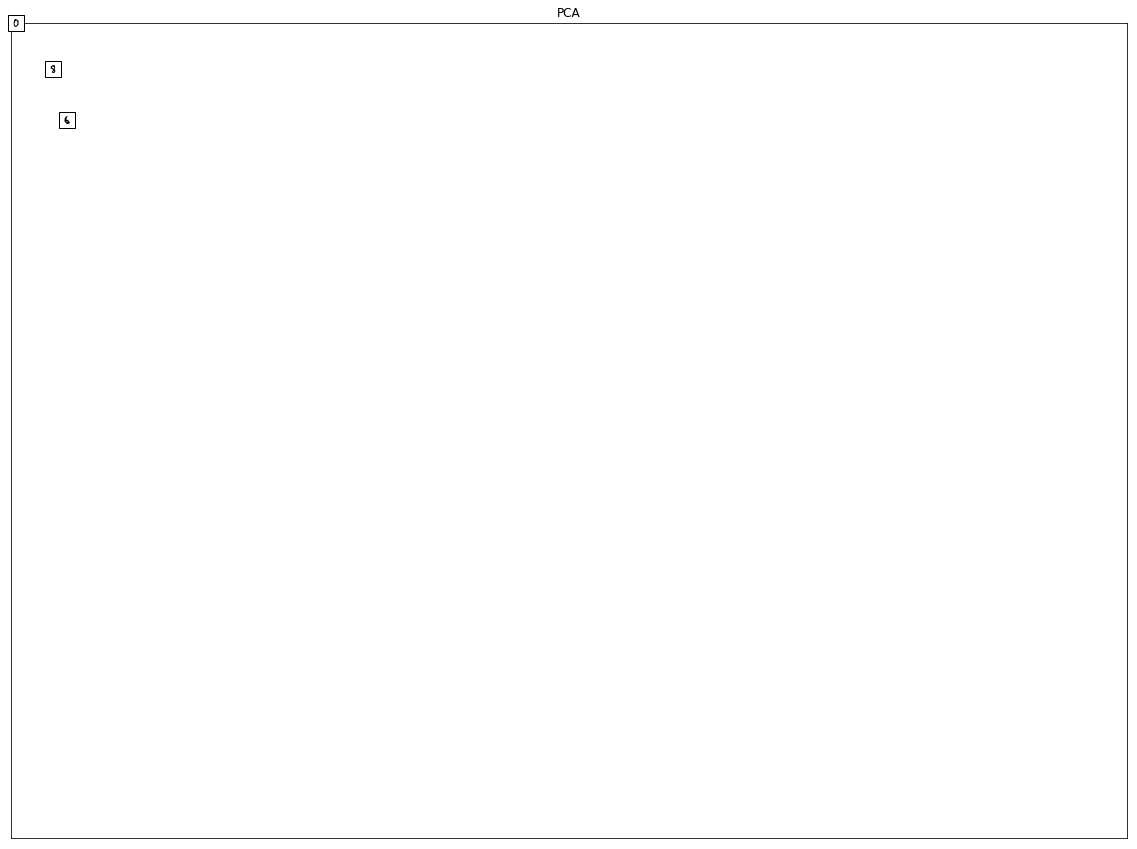

In [98]:
plot_embedding(well_clusters,'PCA')
plt.show()